In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
path = "/content/drive/MyDrive/Data Bootcamp Final Project/vehicle.zip"
df = pd.read_csv(path, index_col=0, parse_dates=["posting_date"])

In [3]:
# Import Dependencies
import numpy as np
import string
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02 08:11:30-06:00
1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02 02:11:50-06:00
2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01 19:50:41-06:00
3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01 15:54:45-06:00
4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01 12:53:56-06:00


In [5]:
df.describe()

,id,price,year,odometer,lat,long
count,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458213 entries, 0 to 458212
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            458213 non-null  int64  
 1   url           458213 non-null  object 
 2   region        458213 non-null  object 
 3   region_url    458213 non-null  object 
 4   price         458213 non-null  int64  
 5   year          457163 non-null  float64
 6   manufacturer  439993 non-null  object 
 7   model         453367 non-null  object 
 8   condition     265273 non-null  object 
 9   cylinders     287073 non-null  object 
 10  fuel          454976 non-null  object 
 11  odometer      402910 non-null  float64
 12  title_status  455636 non-null  object 
 13  transmission  455771 non-null  object 
 14  VIN           270664 non-null  object 
 15  drive         324025 non-null  object 
 16  size          136865 non-null  object 
 17  type          345475 non-null  object 
 18  pain

In [7]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [8]:
# Affect price: posting_date, price, region, state, lat, lon, year, title_status, manufactrer, model, condition, cylinders, fuel, odometer, transmission, drive, size, type, paint_color, 

# To remove: id, url, region_url, VIN, image_url, description. These columns do not have an impact on our model

df_drop = df.drop(columns=['id', 'url', 'region_url', 'VIN', 'image_url','description'])
df_drop.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,al,32.590000,-85.480000,2020-12-02 08:11:30-06:00
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,al,32.547500,-85.468200,2020-12-02 02:11:50-06:00
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al,32.616807,-85.464149,2020-12-01 19:50:41-06:00
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,32.861600,-85.216100,2020-12-01 15:54:45-06:00
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.468200,2020-12-01 12:53:56-06:00


In [9]:
# Reorganize columns order
df_order = df_drop[['posting_date', 'price', 'region', 'state', 'lat', 'long', 'year', 'title_status', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'size', 'type', 'paint_color' ]]

In [10]:
df_order.head()

,posting_date,price,region,state,lat,long,year,title_status,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,2020-12-02 08:11:30-06:00,35990,auburn,al,32.590000,-85.480000,2010.0,clean,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,rwd,NaN,other,NaN
1,2020-12-02 02:11:50-06:00,7500,auburn,al,32.547500,-85.468200,2014.0,clean,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,fwd,NaN,sedan,NaN
2,2020-12-01 19:50:41-06:00,4900,auburn,al,32.616807,-85.464149,2006.0,clean,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,NaN,NaN,SUV,blue
3,2020-12-01 15:54:45-06:00,2000,auburn,al,32.861600,-85.216100,1974.0,clean,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,rwd,full-size,pickup,blue
4,2020-12-01 12:53:56-06:00,19500,auburn,al,32.547500,-85.468200,2005.0,lien,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,automatic,4wd,full-size,pickup,blue


In [11]:
# Convert posting_date into datetime
df_order['date'] = pd.to_datetime(df_order['posting_date'], utc=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# Start cleaning up dataset by examining null values
df_order.isnull().sum()

posting_date        28
price                0
region               0
state                0
lat               7448
long              7448
year              1050
title_status      2577
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
transmission      2442
drive           134188
size            321348
type            112738
paint_color     140843
date                28
dtype: int64

In [13]:
# Need to check each column
df['transmission'].unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [14]:
# Fill NA values with not specified

df_order.fillna({'condition' : 'not specified',
                 'paint_color' : 'not specified',
                 'cylinders' : 'not specified',
                #  'odometer' : df_order['odometer'].mode(),
                 'transmission' : 'other',
                 'drive' : 'not specified',
                 'type' : "other",
                 'fuel' : "other"
                 }, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [15]:
# Col 'size' has a strong correlation with 'model', and this col has many missing values, so drop this col
df_order.drop(['posting_date', 'size'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
# Drop entire rows for the features with low number of null values
columns_to_drop = ['odometer', 'manufacturer', 'model', ]
df_clean = df_order.dropna(subset=columns_to_drop)

In [17]:
df_clean.head()

,price,region,state,lat,long,year,title_status,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,date
0,35990,auburn,al,32.590000,-85.480000,2010.0,clean,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,rwd,other,not specified,2020-12-02 14:11:30+00:00
1,7500,auburn,al,32.547500,-85.468200,2014.0,clean,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan,not specified,2020-12-02 08:11:50+00:00
2,4900,auburn,al,32.616807,-85.464149,2006.0,clean,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,not specified,SUV,blue,2020-12-02 01:50:41+00:00
3,2000,auburn,al,32.861600,-85.216100,1974.0,clean,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,rwd,pickup,blue,2020-12-01 21:54:45+00:00
4,19500,auburn,al,32.547500,-85.468200,2005.0,lien,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,automatic,4wd,pickup,blue,2020-12-01 18:53:56+00:00


In [18]:
# Now, most of columns have no null vaues. Title Status will be cleaned next
df_clean.isnull().sum()

price              0
region             0
state              0
lat             6774
long            6774
year               3
title_status    1589
manufacturer       0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
drive              0
type               0
paint_color        0
date               0
dtype: int64

In [19]:
len(df_clean)

386472

In [20]:
# Filter out rows with title_status 'nan' or 'clean' only. Other values 'lien', 'missing', 'salvage', 'rebuilt', 'parts only' will be dropped
df_final =  df_clean[((df_clean['title_status'].isnull()) | (df_clean['title_status'] == 'clean'))]

In [21]:
len(df_final)

373924

In [22]:
df_final.head()

,price,region,state,lat,long,year,title_status,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,date
0,35990,auburn,al,32.590000,-85.480000,2010.0,clean,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,rwd,other,not specified,2020-12-02 14:11:30+00:00
1,7500,auburn,al,32.547500,-85.468200,2014.0,clean,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan,not specified,2020-12-02 08:11:50+00:00
2,4900,auburn,al,32.616807,-85.464149,2006.0,clean,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,not specified,SUV,blue,2020-12-02 01:50:41+00:00
3,2000,auburn,al,32.861600,-85.216100,1974.0,clean,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,rwd,pickup,blue,2020-12-01 21:54:45+00:00
5,29590,auburn,al,32.590000,-85.480000,2016.0,clean,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,other,not specified,pickup,red,2020-12-01 13:27:25+00:00


In [23]:
# Start clearning the model column. Only take the first word of the model input to feed into the model
df_final['car_model'] = df_final['model'].str.lower().str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df_final['car_model'] = df_final['model'].str.split(n=1, expand=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_final['car_model'] = df_final['car_model'].str.replace('[{}]'.format(string.punctuation), '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_final.head()

,price,region,state,lat,long,year,title_status,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,date,car_model
0,35990,auburn,al,32.590000,-85.480000,2010.0,clean,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,rwd,other,not specified,2020-12-02 14:11:30+00:00,corvette
1,7500,auburn,al,32.547500,-85.468200,2014.0,clean,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan,not specified,2020-12-02 08:11:50+00:00,sonata
2,4900,auburn,al,32.616807,-85.464149,2006.0,clean,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,not specified,SUV,blue,2020-12-02 01:50:41+00:00,x3
3,2000,auburn,al,32.861600,-85.216100,1974.0,clean,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,rwd,pickup,blue,2020-12-01 21:54:45+00:00,c10
5,29590,auburn,al,32.590000,-85.480000,2016.0,clean,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,other,not specified,pickup,red,2020-12-01 13:27:25+00:00,tacoma


In [28]:
len(df_final)

373924

In [29]:
# Filter car models with more than 100 inputs
df_final_filter = df_final.groupby('car_model').filter(lambda x: len(x) > 100)

In [30]:
len(df_final_filter)

352431

In [31]:
# Number of inputs removed
removed = len(df_final) - len(df_final_filter)
removed_perc = round(removed / len(df_final) *100,2)

print(removed)
print(f'% removed {removed_perc}%')

21493
% removed 5.75%


In [32]:
# Remove lower frequency car_model input values
print('Original car model unique inputs:', len(df_final['model'].value_counts()))
print('-------------------------------------------------------------------------')
print('Final car model unique inputs:', len(df_final['car_model'].value_counts()))
print('-------------------------------------------------------------------------')
print('Final car model unique inputs after filter:', len(df_final_filter['car_model'].value_counts()))

Original car model unique inputs: 22533
-------------------------------------------------------------------------
Final car model unique inputs: 2530
-------------------------------------------------------------------------
Final car model unique inputs after filter: 351


In [82]:
# Filter car price range from 0 - $500,000
df_final_filter = df_final[((df_final['price'] > 100) & (df_final['price'] <= 200000)) & ((df_final['odometer'] > 10 ) & (df_final['odometer'] <= 200000))]

In [83]:
# Remove lower frequency car_model input values
print('Original car model unique inputs:', len(df_final['price'].value_counts()))

print('-------------------------------------------------------------------------')
print('Final car model unique inputs after filter:', len(df_final_filter['price'].value_counts()))

Original car model unique inputs: 15981
-------------------------------------------------------------------------
Final car model unique inputs after filter: 15489


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

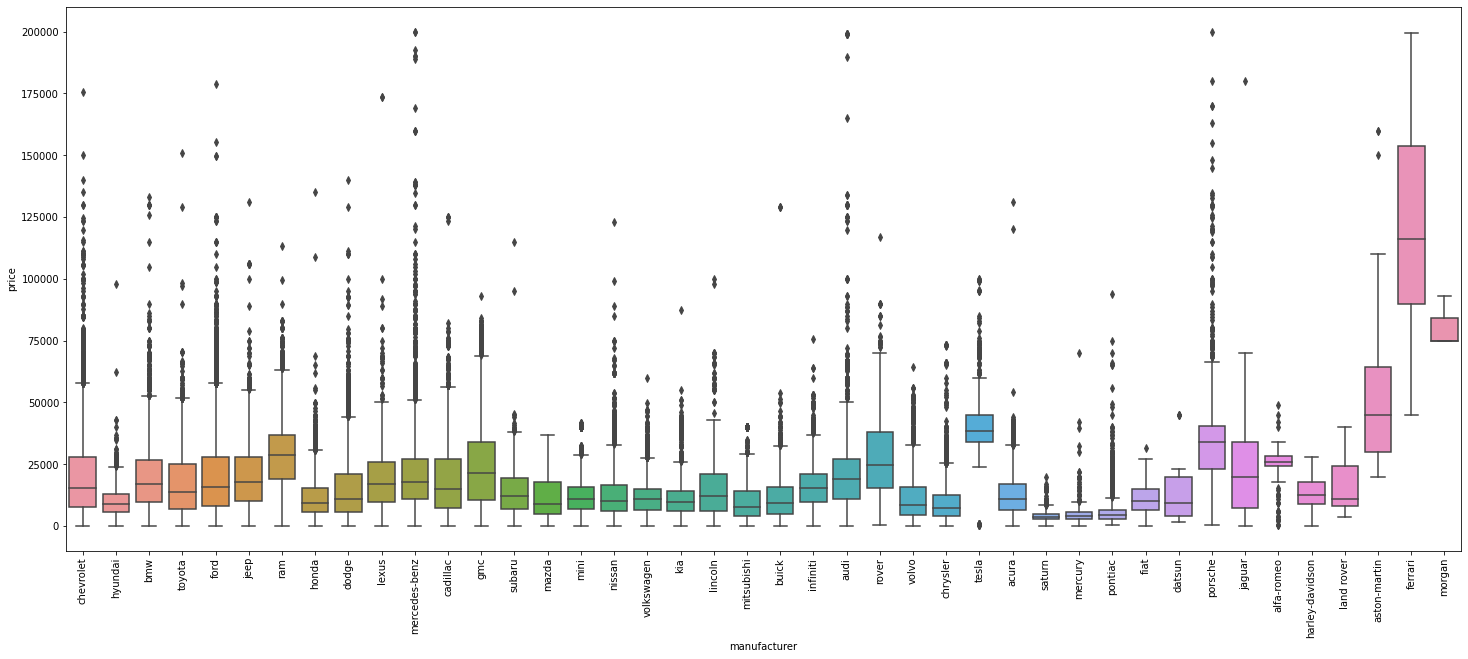

In [84]:
# Plot car price to identify outliers
plt.figure(figsize=(25,10))
sns.boxplot(x='manufacturer'  , y='price'  , data=df_final_filter)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

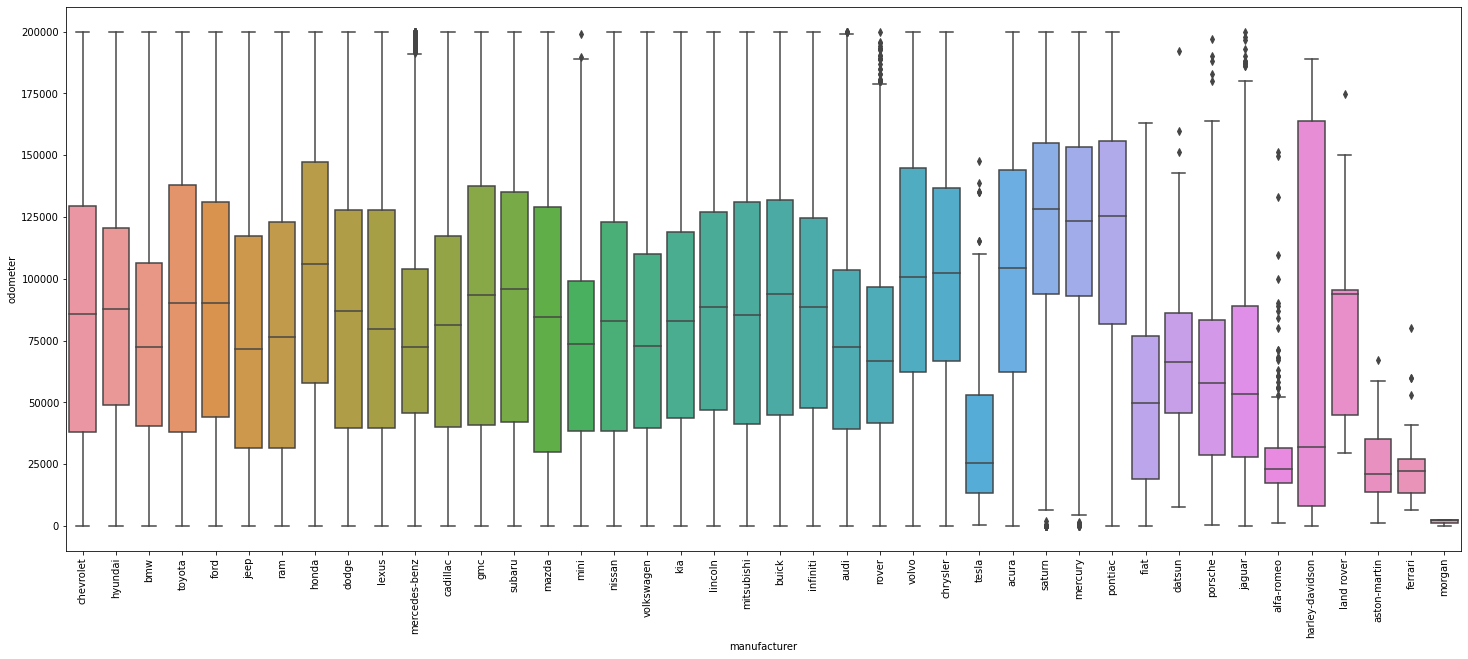

In [85]:
plt.figure(figsize=(25,10))
sns.boxplot(x='manufacturer'  , y='odometer'  , data=df_final_filter)
plt.xticks(rotation=90)

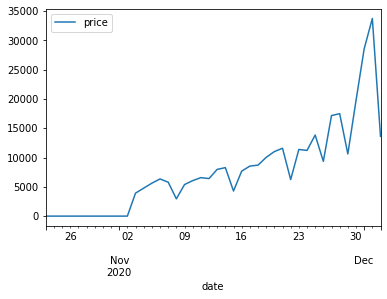

In [103]:
resample_day = df_final_filter.set_index('date')
df_day = resample_day.resample('D').count()
df_day.plot(y='price')

In [105]:
model_df = df_final_filter[['date', 'price', 'manufacturer','car_model', 'year', 'title_status',  'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type', 'paint_color', 'region', 'state', 'lat', 'long' ]]
model_df.set_index('date', inplace=True)

path = "/content/drive/MyDrive/Data Bootcamp Final Project/model_df.zip"

model_df.to_csv(path, compression='zip')

# Limitations

- Data only includes data for 1.5 months between Nov and Dec 2020.
- String NaN values are replaced by 'not specified'
- Long and Lat values include locations outside of land and into the ocean.
- Price range was limited to reasonable range between \$ 100 - $ 300,000.
- Odometer range was limited to 10 - 200,000 km.